<a href="https://colab.research.google.com/github/ToriStoner/ToriStoner/blob/main/API_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#create python code that takes a user input for a stock

import json
import pandas as pd
import requests


In [77]:
stock=input()

MSFT


In [78]:
print("The Stock we will research is:" + stock)

The Stock we will research is:MSFT


In [79]:
apikey="RX5XAwloUg35lvJCyosjzacIKmAVKHuc6ftrXN7H"

url = f'https://yfapi.net/v8/finance/chart/{stock}?comparisons=MSFT%2C%5EVIX&range=1mo&region=US&interval=1d&lang=en&events=div%2Csplit'

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"MSFT","exchangeName":"NMS","fullExchangeName":"NasdaqGS","instrumentType":"EQUITY","firstTradeDate":511108200,"regularMarketTime":1727897289,"hasPrePostMarketData":true,"gmtoffset":-14400,"timezone":"EDT","exchangeTimezoneName":"America/New_York","regularMarketPrice":418.81,"fiftyTwoWeekHigh":422.77,"fiftyTwoWeekLow":416.71,"regularMarketDayHigh":422.77,"regularMarketDayLow":416.71,"regularMarketVolume":10324188,"longName":"Microsoft Corporation","shortName":"Microsoft Corporation","chartPreviousClose":417.14,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EDT","end":1727875800,"start":1727856000,"gmtoffset":-14400},"regular":{"timezone":"EDT","end":1727899200,"start":1727875800,"gmtoffset":-14400},"post":{"timezone":"EDT","end":1727913600,"start":1727899200,"gmtoffset":-14400}},"dataGranularity":"1d","range":"1mo","validRanges":["1mo","1y","5d","5y","2y","ytd","max","6mo","1d","3mo","10y"]},"timestamp":[1725370200,172545

In [80]:
#ticker name, full name of stock, current market price
#target mean price, 52 week high and low
#5 of the current trending stock

stock_json = response.json()

api_one = print(stock_json['chart']['result'][0]['comparisons'][0]['symbol'] + " Long Name: " + stock_json['chart']['result'][0]['meta']["longName"] + " Current Market Price: " +
      str(stock_json['chart']['result'][0]['meta']['regularMarketPrice']) + " 52 Week High: " + str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekHigh']) + " 52 Week Low: " + str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekLow']))

^VIX Long Name: Microsoft Corporation Current Market Price: 418.81 52 Week High: 422.77 52 Week Low: 416.71


In [81]:
apikey="RX5XAwloUg35lvJCyosjzacIKmAVKHuc6ftrXN7H"

url = f'https://yfapi.net/v11/finance/quoteSummary/{stock}?lang=en&region=US&modules=financialData'


querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

second = requests.request("GET", url, headers=headers, params=querystring)

print(second.text)

{"quoteSummary":{"result":[{"financialData":{"maxAge":86400,"currentPrice":{"raw":418.85,"fmt":"418.85"},"targetHighPrice":{"raw":600.0,"fmt":"600.00"},"targetLowPrice":{"raw":440.0,"fmt":"440.00"},"targetMeanPrice":{"raw":496.38,"fmt":"496.38"},"targetMedianPrice":{"raw":500.0,"fmt":"500.00"},"recommendationMean":{"raw":1.7,"fmt":"1.70"},"recommendationKey":"buy","numberOfAnalystOpinions":{"raw":47,"fmt":"47","longFmt":"47"},"totalCash":{"raw":75531001856,"fmt":"75.53B","longFmt":"75,531,001,856"},"totalCashPerShare":{"raw":10.162,"fmt":"10.16"},"ebitda":{"raw":129433001984,"fmt":"129.43B","longFmt":"129,433,001,984"},"totalDebt":{"raw":97851998208,"fmt":"97.85B","longFmt":"97,851,998,208"},"quickRatio":{"raw":1.141,"fmt":"1.14"},"currentRatio":{"raw":1.275,"fmt":"1.27"},"totalRevenue":{"raw":245122007040,"fmt":"245.12B","longFmt":"245,122,007,040"},"debtToEquity":{"raw":36.447,"fmt":"36.45%"},"revenuePerShare":{"raw":32.986,"fmt":"32.99"},"returnOnAssets":{"raw":0.14802,"fmt":"14.80%

In [82]:
target_json = second.json()

api_two = print(target_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice'])


{'raw': 496.38, 'fmt': '496.38'}


In [83]:
apikey="RX5XAwloUg35lvJCyosjzacIKmAVKHuc6ftrXN7H"

url = 'https://yfapi.net/v1/finance/trending/US'


querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

third = requests.request("GET", url, headers=headers, params=querystring)

print(third.text)

{"finance":{"result":[{"count":20,"quotes":[{"symbol":"HUM"},{"symbol":"TSLA"},{"symbol":"JOBY"},{"symbol":"CLOV"},{"symbol":"NKE"},{"symbol":"NVAX"},{"symbol":"NKLA"},{"symbol":"CRM"},{"symbol":"WHLR"},{"symbol":"SARO"},{"symbol":"MELI"},{"symbol":"API"},{"symbol":"TRP.TO"},{"symbol":"CAG"},{"symbol":"CTRYY"},{"symbol":"TOP"},{"symbol":"ENVX"},{"symbol":"KXIN"},{"symbol":"TRP"},{"symbol":"HKD"}],"jobTimestamp":1727892817855,"startInterval":202410021700}],"error":null}}


In [84]:
trending_json = third.json()


In [85]:
api_three = []
for i in trending_json['finance']['result'][0]['quotes'][:5]:
  for value in i.values():
    api_three.append(value)

print(api_three)



['HUM', 'TSLA', 'JOBY', 'CLOV', 'NKE']


In [86]:
#putting the outputs in one df

api_one = stock_json['chart']['result'][0]['comparisons'][0]['symbol'] +  stock_json['chart']['result'][0]['meta']["longName"] + str(stock_json['chart']['result'][0]['meta']['regularMarketPrice']) +  str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekHigh']) + str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekLow'])

api_two = target_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']

api_three = api_three


In [87]:
df = pd.DataFrame({'api_one': [api_one], 'api_two': [api_two], 'api_three': [api_three]})


In [88]:
print(df)

                                       api_one  \
0  ^VIXMicrosoft Corporation418.81422.77416.71   

                            api_two                     api_three  
0  {'raw': 496.38, 'fmt': '496.38'}  [HUM, TSLA, JOBY, CLOV, NKE]  


In [89]:
#output to csv

df.to_csv('output.csv')

In [90]:
#plot the highest value of a stock at each of the last 5 days?'


apikey="RX5XAwloUg35lvJCyosjzacIKmAVKHuc6ftrXN7H"

url = 'https://yfapi.net/v8/finance/chart/AAPL?comparisons=MSFT%2C%5EVIX&range=5d&region=US&interval=1d&lang=en&events=div%2Csplit'

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

five_days = requests.request("GET", url, headers=headers, params=querystring)

print(five_days.text)


{"chart":{"result":[{"meta":{"currency":"USD","symbol":"AAPL","exchangeName":"NMS","fullExchangeName":"NasdaqGS","instrumentType":"EQUITY","firstTradeDate":345479400,"regularMarketTime":1727897294,"hasPrePostMarketData":true,"gmtoffset":-14400,"timezone":"EDT","exchangeTimezoneName":"America/New_York","regularMarketPrice":227.29,"fiftyTwoWeekHigh":227.33,"fiftyTwoWeekLow":223.03,"regularMarketDayHigh":227.33,"regularMarketDayLow":223.03,"regularMarketVolume":24564756,"longName":"Apple Inc.","shortName":"Apple Inc.","chartPreviousClose":226.37,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EDT","end":1727875800,"start":1727856000,"gmtoffset":-14400},"regular":{"timezone":"EDT","end":1727899200,"start":1727875800,"gmtoffset":-14400},"post":{"timezone":"EDT","end":1727913600,"start":1727899200,"gmtoffset":-14400}},"dataGranularity":"1d","range":"5d","validRanges":["1mo","2y","1y","ytd","5d","5y","3mo","10y","1d","6mo","max"]},"timestamp":[1727357400,1727443800,1727703000,1727789

In [91]:
five_days = five_days.json()

In [92]:
fiveday_values = five_days['chart']['result'][0]['comparisons'][0]['high'][:5]

In [93]:
print(fiveday_values)

[435.3, 431.85, 430.42, 428.48, 422.77]


In [94]:
days = [1, 2, 3, 4, 5]

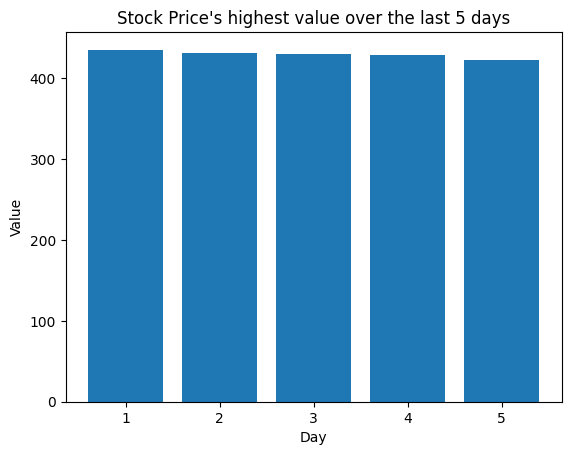

In [95]:
import matplotlib.pyplot as plt

plt.bar(days, fiveday_values)
plt.title("Stock Price's highest value over the last 5 days")
plt.xlabel("Day")
plt.ylabel("Value")
plt.show()

